# Data Exploration

Lakukanlah proses data exploration pada open dataset  Breast Cancer Wisconsin (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) dengan langkah-langkah seperti yang telah dicontohkan.

Referensi:
- https://elen.nurulfikri.ac.id/mod/resource/view.php?id=13821

# 1. importing essential library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

plt.style.use('fivethirtyeight')  
warnings.filterwarnings('ignore')

# 2. Load dataset

In [2]:
cancer = pd.read_csv('breast-cancer-wisconsin.data', header=None)
cancer.to_csv('breast-cancer-wisconsin.data', header=['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'], index=False)
cancer = pd.read_csv('breast-cancer-wisconsin.data')
cancer

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# 3. Checking any missing value

In [3]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
cancer['Class'].replace({2 : 'benign', 4 : 'malignant'}, inplace=True)
cancer['Class'].value_counts()

benign       458
malignant    241
Name: Class, dtype: int64

# 4. General Statistics

In [5]:
cancer.drop(columns=['Sample code number'], inplace=True)

Text(0.5, 1.0, 'General Statistics of  Breast Cancer Wisconsin Dataset')

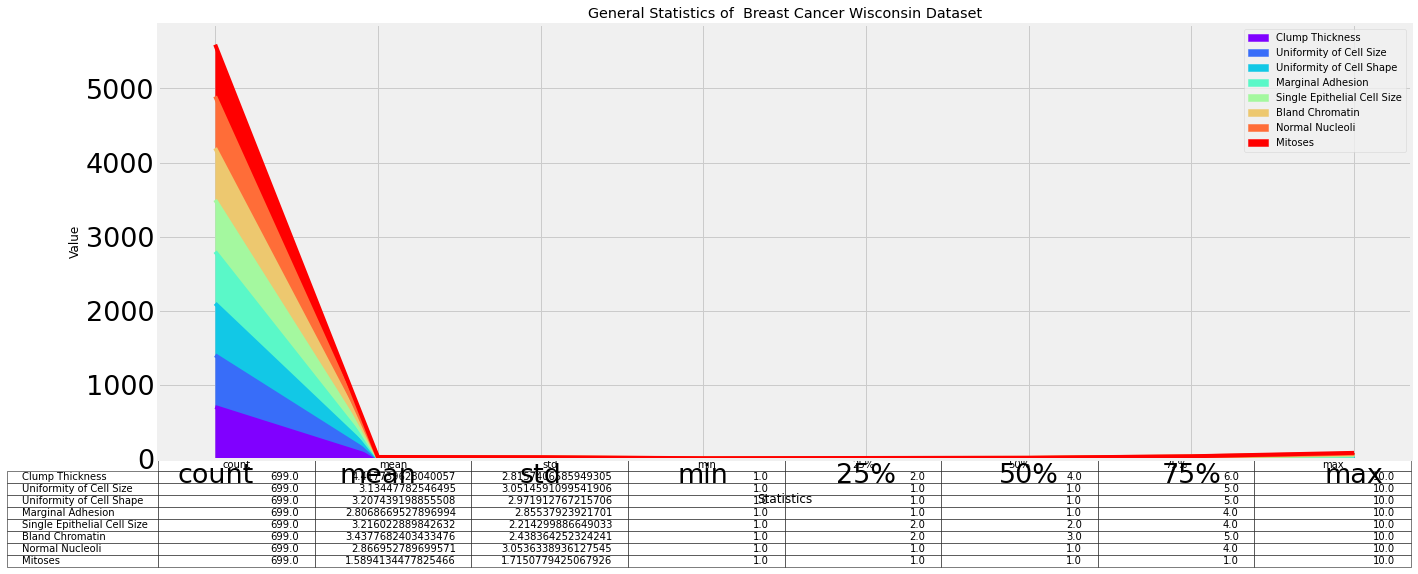

In [6]:
cancer.describe().plot(kind="area", fontsize=27, figsize=(20,8), table=True, colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of  Breast Cancer Wisconsin Dataset")

# 5. Visualization

## Countplot

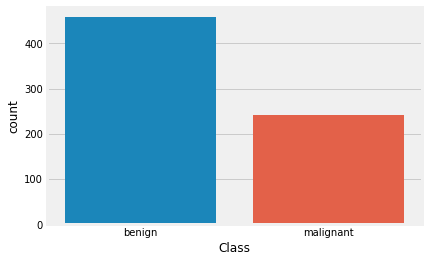

In [7]:
sns.countplot('Class', data=cancer)
plt.show()

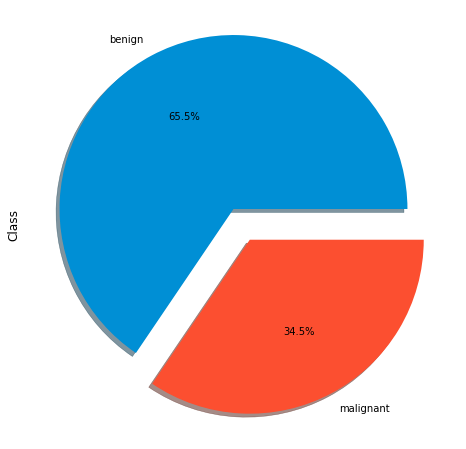

In [8]:
cancer['Class'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, figsize=(10,8))
plt.show()

## Jointplot

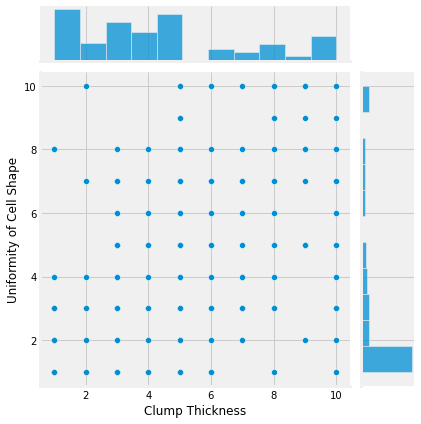

In [9]:
fig=sns.jointplot(x='Clump Thickness', y='Uniformity of Cell Shape', data=cancer)

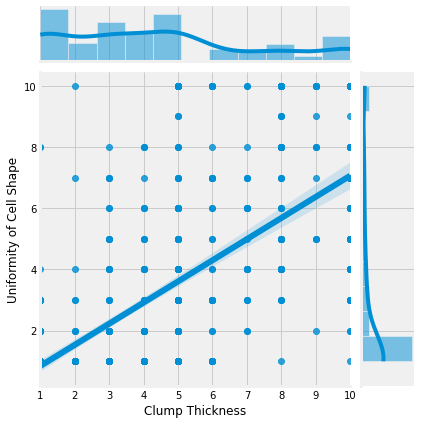

In [10]:
sns.jointplot('Clump Thickness', 'Uniformity of Cell Shape', data=cancer, kind="reg")

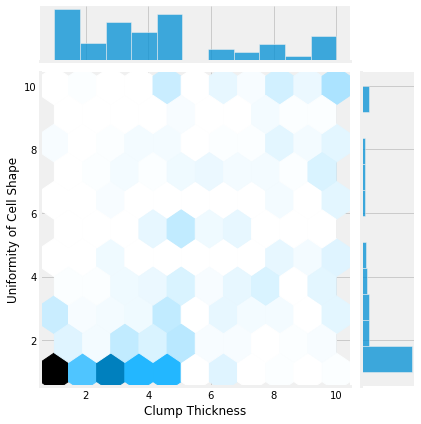

In [11]:
fig=sns.jointplot(x='Clump Thickness', y='Uniformity of Cell Shape', kind='hex', data=cancer)

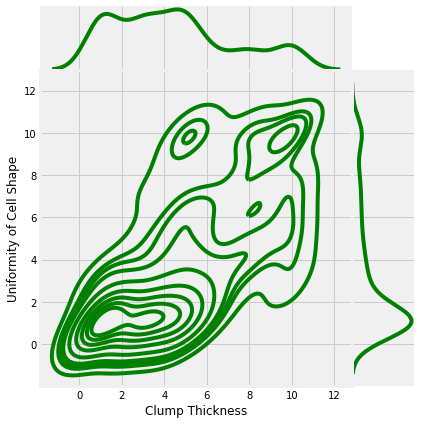

In [12]:
sns.jointplot('Clump Thickness', 'Uniformity of Cell Shape', data=cancer, kind="kde", space=0, color='g')

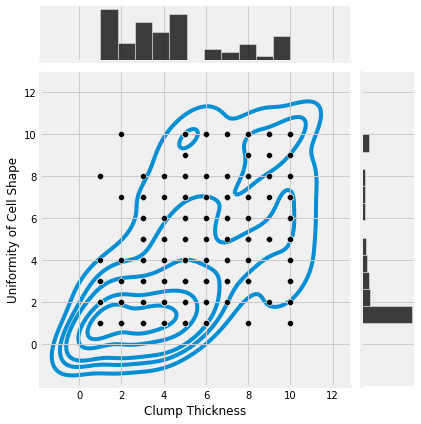

In [13]:
g = (sns.jointplot('Clump Thickness', 'Uniformity of Cell Shape', data=cancer, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=6))

## FacetGrid

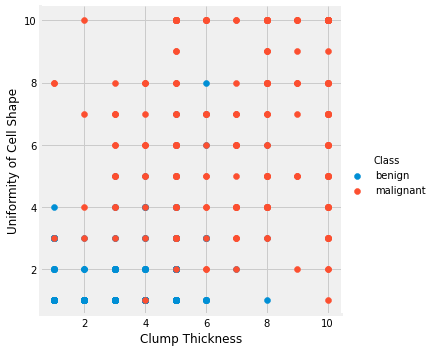

In [14]:
%matplotlib inline
sns.FacetGrid(cancer, hue='Class', size=5).map(plt.scatter, 'Clump Thickness', 'Uniformity of Cell Shape').add_legend()

## Boxplot

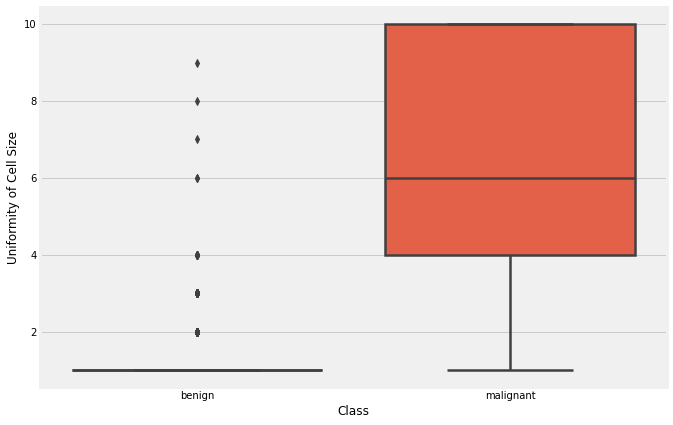

In [15]:
fig = plt.gcf()
fig.set_size_inches(10,7)
fig = sns.boxplot(x='Class', y='Uniformity of Cell Size', data=cancer, order=['benign', 'malignant'], linewidth=2.5, orient='v', dodge=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcacc3fe5f8>,
      dtype=object)

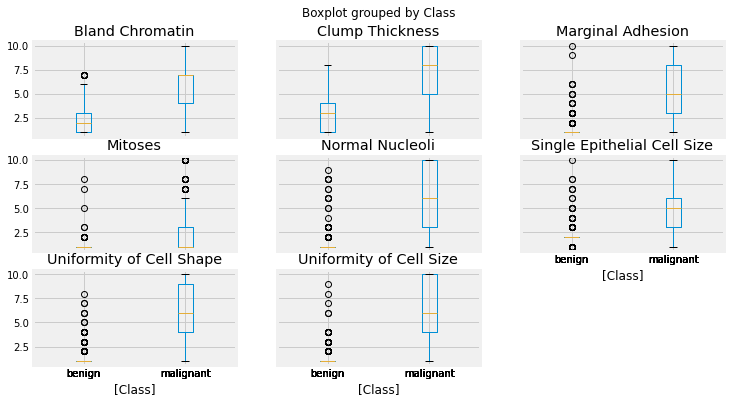

In [16]:
cancer.boxplot(by="Class", figsize=(12, 6))

## Stripplot

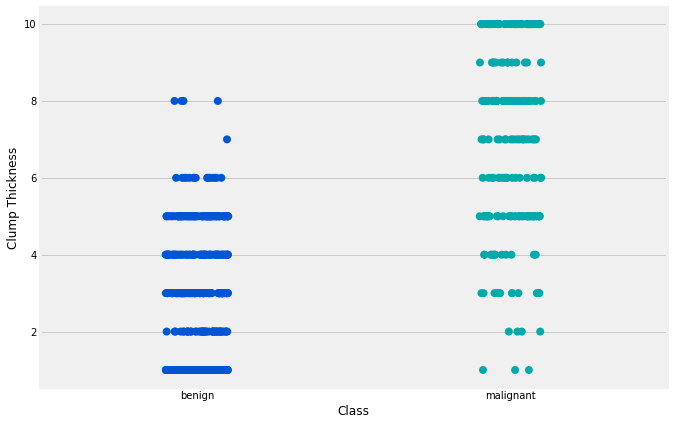

In [17]:
fig = plt.gcf()
fig.set_size_inches(10,7)
fig = sns.stripplot(x='Class', y='Clump Thickness', data=cancer, jitter=True, edgecolor='gray', size=8, palette='winter', orient='v')

## Combination of boxplot and stripplot

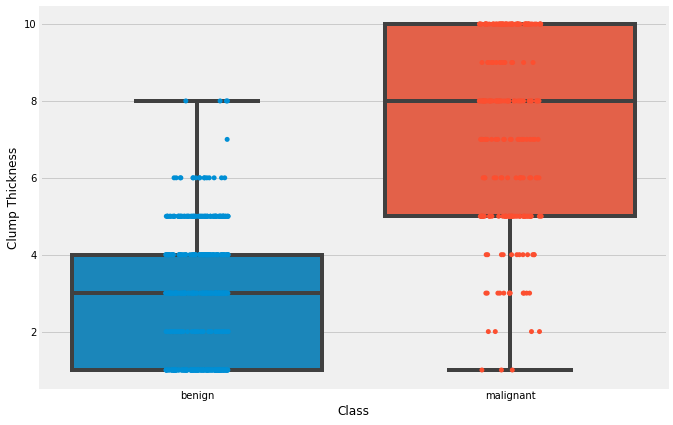

In [18]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Class', y='Clump Thickness',data=cancer)
fig=sns.stripplot(x='Class', y='Clump Thickness',data=cancer,jitter=True,edgecolor='gray')

## Violinplot

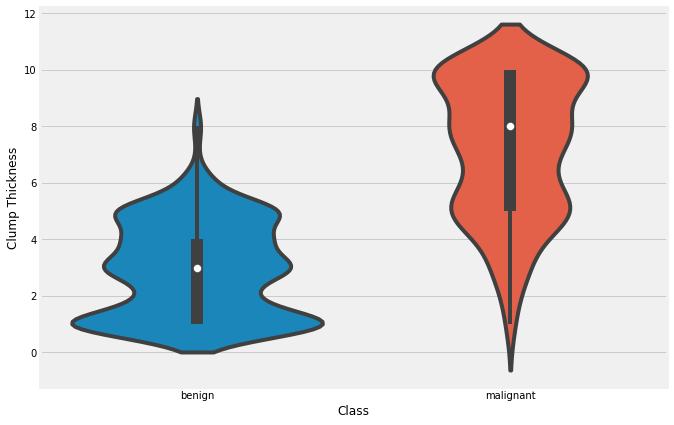

In [19]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='Class',y='Clump Thickness',data=cancer)

## Pairplot

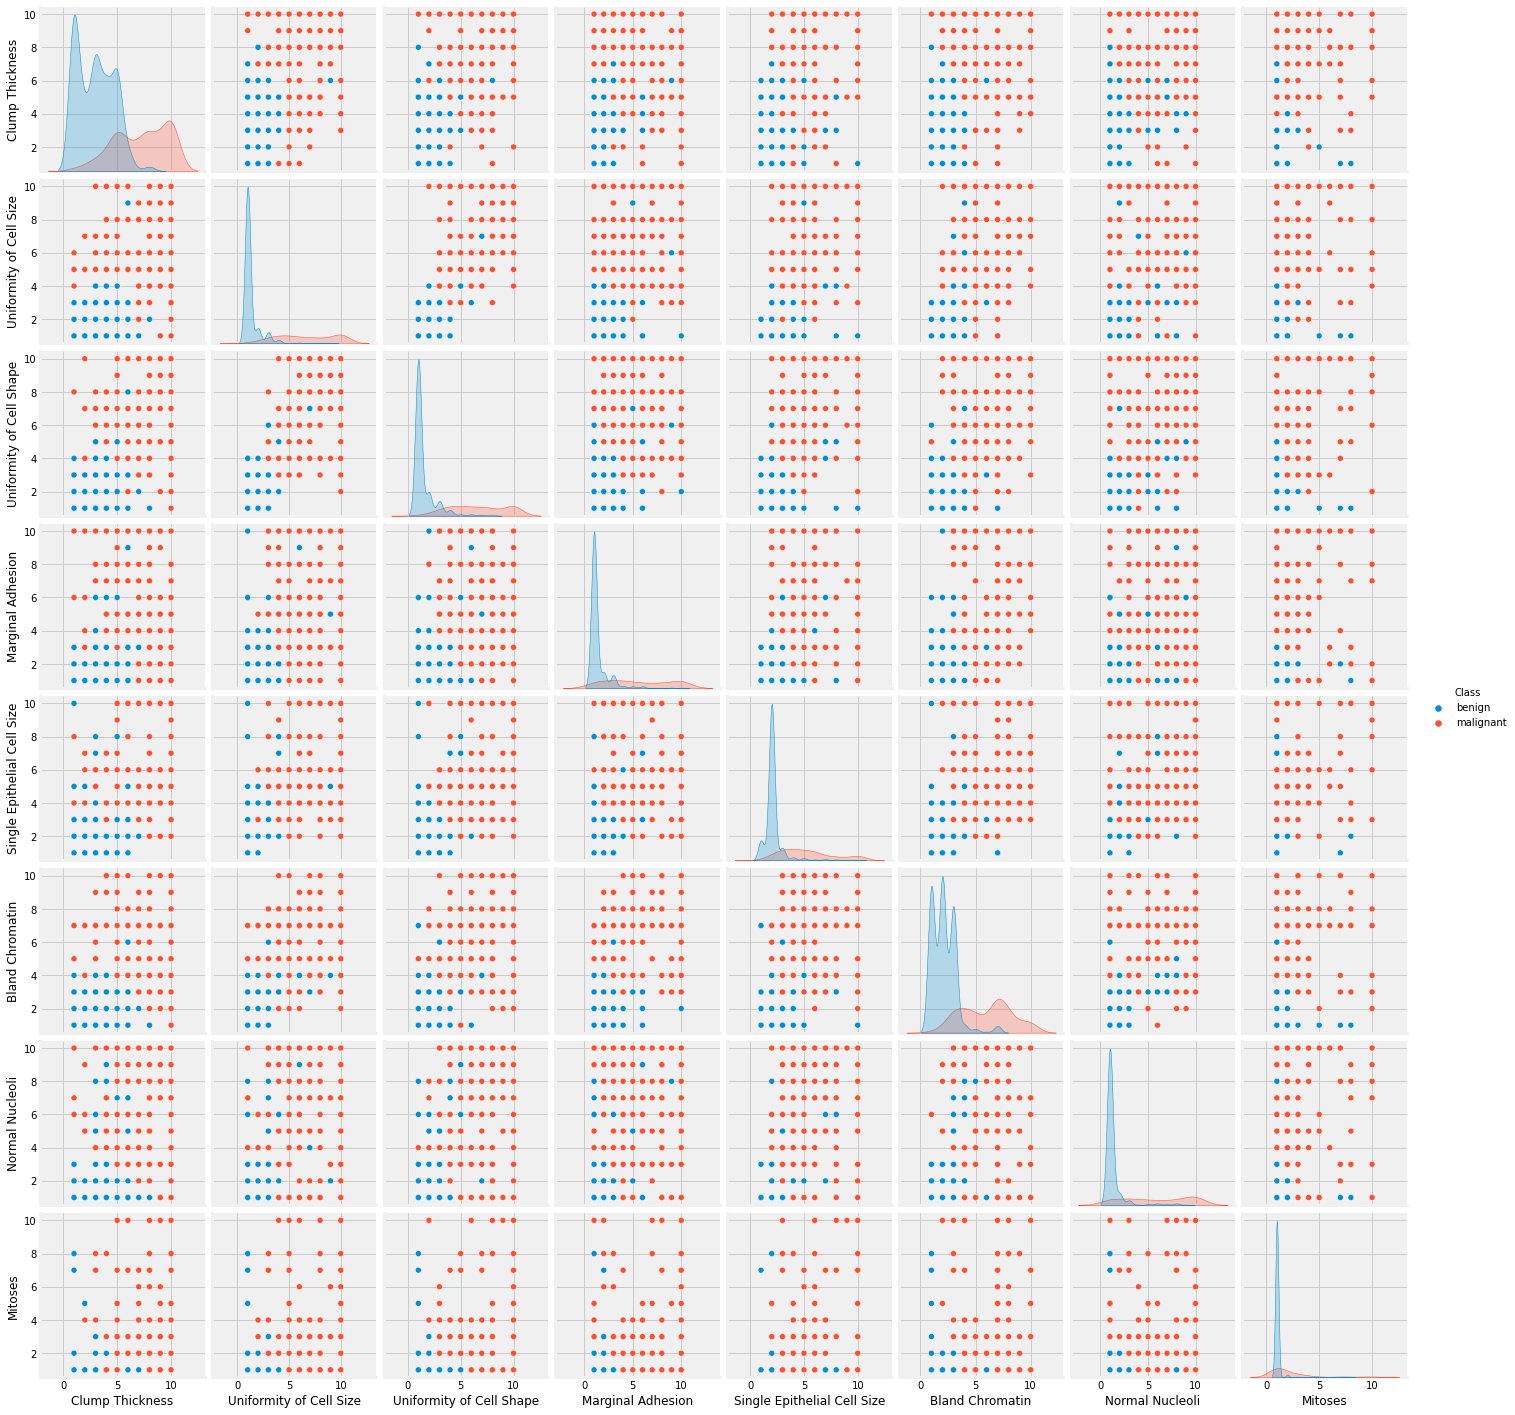

In [20]:
sns.pairplot(cancer,hue='Class')

## Histogram

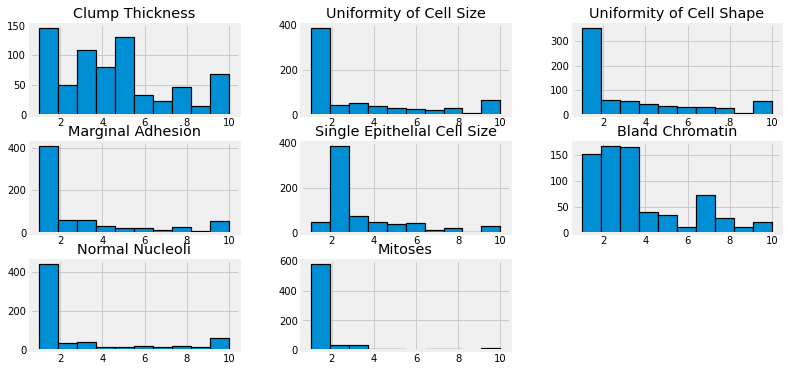

In [21]:
cancer.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

## Swarmplot

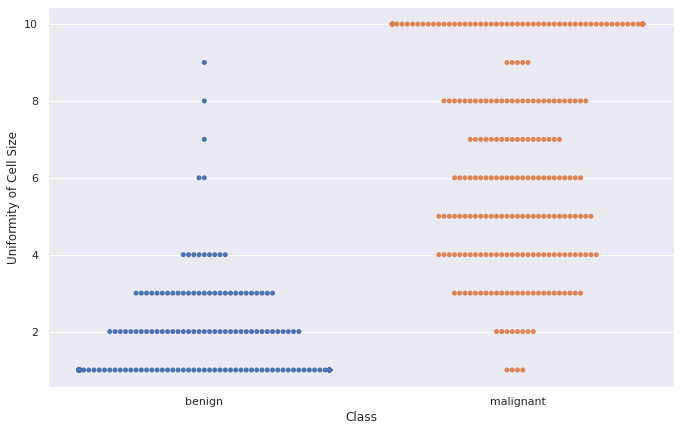

In [22]:
sns.set(style="darkgrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sns.swarmplot(x="Class", y="Uniformity of Cell Size", data=cancer)

## Violin + swarmplot

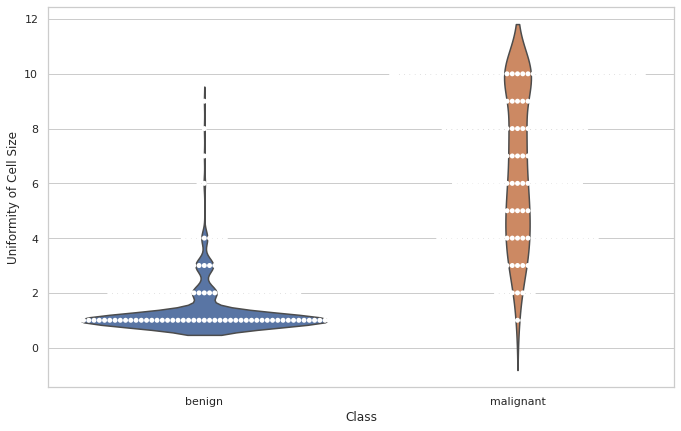

In [23]:
sns.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
ax = sns.violinplot(x="Class", y="Uniformity of Cell Size", data=cancer, inner=None)
ax = sns.swarmplot(x="Class", y="Uniformity of Cell Size", data=cancer,color="white", edgecolor="black")

## Species based classification

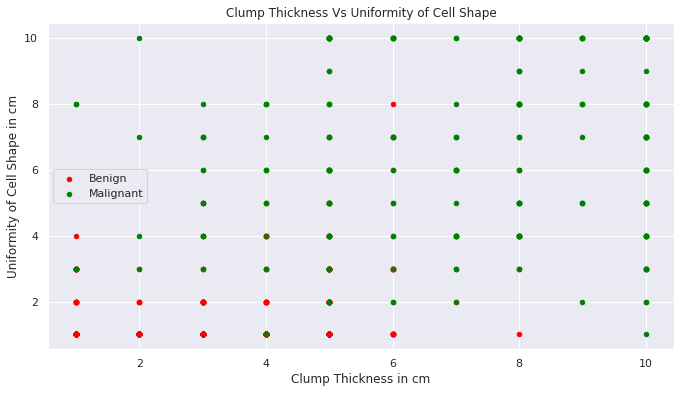

In [24]:
sns.set(style="darkgrid")
sc=cancer[cancer.Class=='benign'].plot(kind='scatter',x='Clump Thickness',y='Uniformity of Cell Shape',color='red',label='Benign')
cancer[cancer.Class=='malignant'].plot(kind='scatter',x='Clump Thickness',y='Uniformity of Cell Shape',color='green',label='Malignant',ax=sc)
sc.set_xlabel('Clump Thickness in cm')
sc.set_ylabel('Uniformity of Cell Shape in cm')
sc.set_title('Clump Thickness Vs Uniformity of Cell Shape')
sc=plt.gcf()
sc.set_size_inches(10,6)

## LM plot

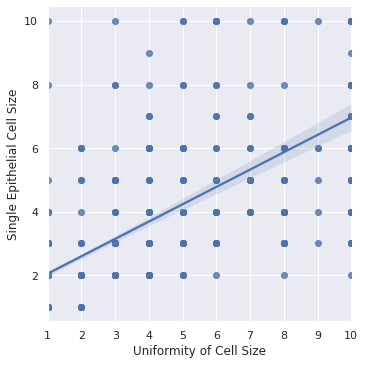

In [25]:
fig=sns.lmplot(x="Uniformity of Cell Size", y="Single Epithelial Cell Size",data=cancer)

## Facet grid

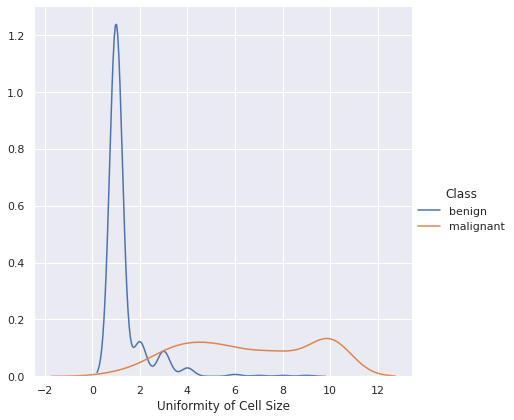

In [26]:
sns.FacetGrid(cancer, hue="Class", size=6).map(sns.kdeplot, "Uniformity of Cell Size").add_legend()
plt.ioff() 